In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [21]:
df=pd.read_table('STUDENT_INTERNSHIP_2013_2018_DATA_TABLE.txt',encoding='cp1252',na_values=None,decimal=b',')
df.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,ANNEE,ANNEE_SCOLAIRE,ENTREPRISE,CODE_POSTAL,VILLE,PAYS,SUJET,REMUNERATION,ID_ANO
0,ING3,2013/2014,MUREX,75782,PARIS CEDEX 16,France,Au sein de cette équipe et sous la responsabil...,2085.0,80502585
1,ING3,2016/2017,LAFARGE,75782,PARIS CEDEX 16,France,DD : CONVENTION DAUPHINE. Data Management Thir...,1400.0,76580713
2,ING3,2014/2015,MUREX,75782,PARIS CEDEX 16,France,Déploiement d'une solution BI à l'internationa...,2085.0,41399386
3,ING3 - Contrat Pro,2015/2016,MUREX,75782,PARIS CEDEX 16,France,Contrat de professionnalisation - Titre d'Ingé...,NaN,28906550
4,ING1,2015/2016,BLACKHOLE LAB,75784,PARIS,France,Base de données + développement site web. Le s...,554.4,71549024


In [22]:
df.count()

ANNEE             2494
ANNEE_SCOLAIRE    2492
ENTREPRISE        2495
CODE_POSTAL       2434
VILLE             2489
PAYS              2495
SUJET             2486
REMUNERATION      2142
ID_ANO            2495
dtype: int64

In [24]:
df['ANNE']=df['ANNEE_SCOLAIRE'].str[:4]
df.head()

,ANNEE,ANNEE_SCOLAIRE,ENTREPRISE,CODE_POSTAL,VILLE,PAYS,SUJET,REMUNERATION,ID_ANO,ANNE
0,ING3,2013/2014,MUREX,75782,PARIS CEDEX 16,France,Au sein de cette équipe et sous la responsabil...,2085.0,80502585,2013
1,ING3,2016/2017,LAFARGE,75782,PARIS CEDEX 16,France,DD : CONVENTION DAUPHINE. Data Management Thir...,1400.0,76580713,2016
2,ING3,2014/2015,MUREX,75782,PARIS CEDEX 16,France,Déploiement d'une solution BI à l'internationa...,2085.0,41399386,2014
3,ING3 - Contrat Pro,2015/2016,MUREX,75782,PARIS CEDEX 16,France,Contrat de professionnalisation - Titre d'Ingé...,NaN,28906550,2015
4,ING1,2015/2016,BLACKHOLE LAB,75784,PARIS,France,Base de données + développement site web. Le s...,554.4,71549024,2015


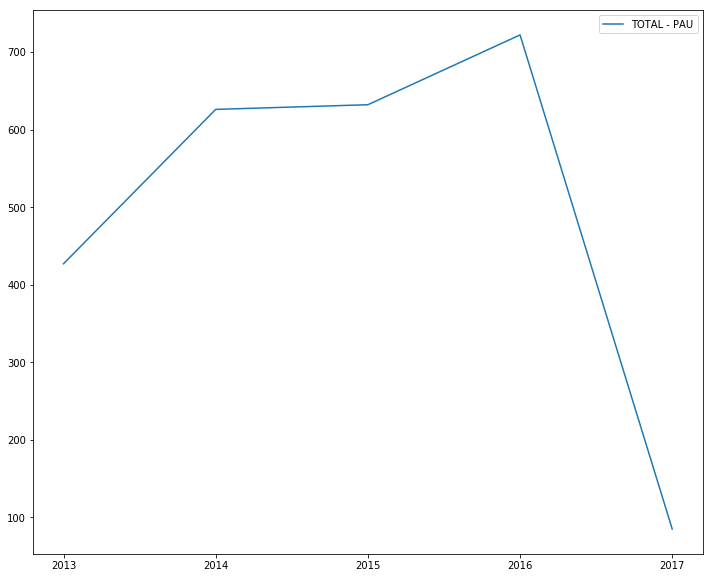

In [31]:
QtdEnterpAnne=df.groupby(['ANNE']).size()
years=pd.DataFrame(QtdEnterpAnne.index)
QtdEnter=pd.DataFrame(QtdEnterpAnne[:].values)
plt.subplots(figsize=(12, 10))
plt.plot( QtdEnterpAnne,   label=p )
plt.legend( loc='upper right')
plt.show()

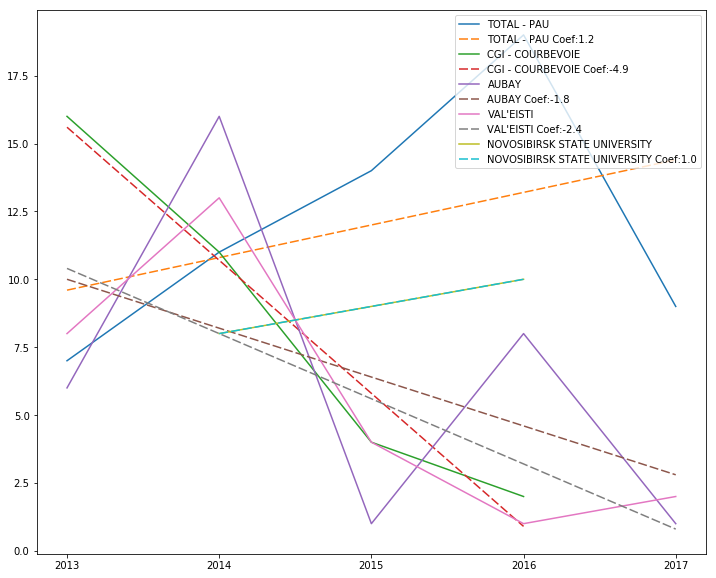

In [33]:
#The BIGGEST
bigs=df.groupby(['ENTREPRISE']).size().nlargest(5)
enterp=bigs.index.values
model = LinearRegression() 
plt.subplots(figsize=(12, 10))
for p in enterp:
    z=df[ (df['ENTREPRISE']==p) ].groupby('ANNE').size()
    X=pd.DataFrame(z.index)
    y=pd.DataFrame(z[:].values)
    model.fit(X, y)
    yLinear=model.predict(X)
    plt.plot( z,   label=p )
    plt.plot( z.index, yLinear,  label=p+' Coef:'+ str( round( model.coef_[0][0], 2)), dashes=[6,2] )

plt.legend( loc='upper right')
plt.show()

In [82]:
yLinear

array([[4.7],
       [5.4],
       [6.1],
       [6.8]])

In [80]:
#GROWING
enterpDF=df.groupby(['ENTREPRISE']).size()
enterpDF5= enterpDF[ enterpDF.values>=10 ]
enterp=enterpDF5.index.values
model = LinearRegression() 
enterpGrow={}
for p in enterp:
    z=df[ (df['ENTREPRISE']==p) ].groupby('ANNE').size()
    X=pd.DataFrame(z.index)
    y=pd.DataFrame(z[:].values)
    model.fit(X, y)
    enterpGrow[p]=model.coef_[0][0]

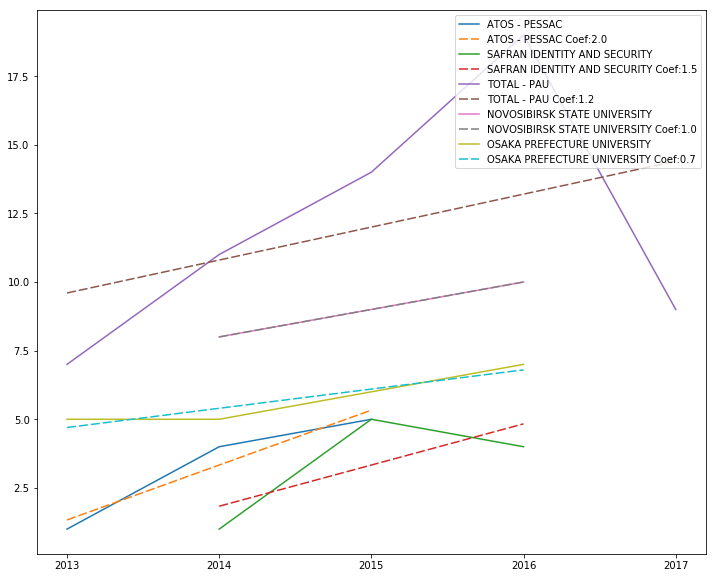

In [81]:
enterpGrowD = sorted(enterpGrow.items(), key=lambda kv: kv[1], reverse=True)
# TAKE the 5 bigger
enterpGrowD=enterpGrowD[:5]
plt.subplots(figsize=(12, 10))
for p, value in enterpGrowD:
    z=df[ (df['ENTREPRISE']==p) ].groupby('ANNE').size()
    X=pd.DataFrame(z.index)
    y=pd.DataFrame(z[:].values)
    model.fit(X, y)
    yLinear=model.predict(X)       
    plt.plot( z,   label=p )
    plt.plot( z.index, yLinear,  label=p+' Coef:'+ str( round( model.coef_[0][0], 2)), dashes=[6,2] )

plt.legend( loc='upper right')
plt.show()

In [76]:
enterpGrowD[:5]

[('ATOS - PESSAC', 1.9999999999999996),
 ('ALTRAN - VELIZY-VILLACOUBLAY', 1.9999999999999993),
 ('ENEDIS DR PYRENEES ET LANDES', 1.9999999999999993),
 ('CGI - TOULOUSE', 1.4999999999999998),
 ('SAFRAN IDENTITY AND SECURITY', 1.4999999999999993)]

In [73]:
enterpGrow

{'ACENSI': 0.9999999999999998,
 'ALLIANZ': -0.6428571428571431,
 'ALTEN': -1.4175103710814567e-16,
 'ALTRAN - VELIZY-VILLACOUBLAY': 1.9999999999999993,
 'AMUNDI ALTERNATIVE INVESTMENTS': -0.9999999999999997,
 'ATOS - PESSAC': 1.9999999999999996,
 'AUBAY': -1.8000000000000005,
 'AVANADE': -0.9000000000000002,
 'BANQUE DE FRANCE': 0.7000000000000002,
 'BEARING POINT': -0.4999999999999999,
 'BKBIET - BIRLA INSTITUTE OF ENGINEERING AND TECHNOLOGY': 0.7142857142857143,
 'BNP PARIBAS': -0.9999999999999998,
 'BOUYGUES TELECOM': -0.3333333333333332,
 'BRED BANQUE POPULAIRE': 0.9999999999999998,
 'BUSINESS & DECISION': 0.10000000000000002,
 'CAPGEMINI AEROSPATIAL & DEFENSE - BAYONNE': 0.9999999999999997,
 'CAPGEMINI TECHNOLOGY SERVICES - SURESNES': 0.30000000000000004,
 'CAPGEMINI TECHNOLOGY SERVICES - TOULOUSE': -1.8000000000000005,
 'CGI - COURBEVOIE': -4.900000000000002,
 'CGI - TOULOUSE': 1.4999999999999998,
 'CREDIT AGRICOLE - MONTROUGE': 0.9999999999999998,
 'CREDIT AGRICOLE CIB - LA DÉFE